In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['image.cmap'] = 'gray'

In [2]:
scrn_st_path = "traffic_sim/screenshots"
scrn_st_list = os.listdir(scrn_st_path)
scrn_st_list.sort()

In [3]:
index = 81
path = os.path.join(scrn_st_path, scrn_st_list[index])

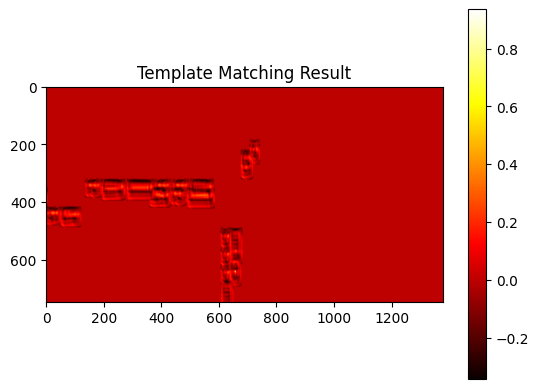

(array([640]), array([657]))
Bounding Box: Top-left (np.int64(657), np.int64(640)), Bottom-right (np.int64(679), np.int64(694))


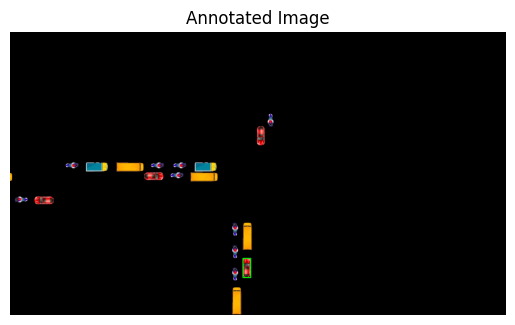

True

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the main image and the template
main_image = cv2.imread(path)
template = cv2.imread("traffic_sim/images/up/car.png")

# Convert to grayscale
main_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Perform template matching
result = cv2.matchTemplate(main_gray, template_gray, cv2.TM_CCOEFF_NORMED)

# Visualize the result
plt.figure()
plt.imshow(result, cmap='hot')
plt.colorbar()
plt.title("Template Matching Result")
plt.show()

# Define threshold
threshold = 0.9
locations = np.where(result >= threshold)

# Get template dimensions
template_height, template_width = template_gray.shape[:2]

# Draw bounding boxes on the main image
annotated_image = main_image.copy()
print(locations)
for pt in zip(*locations[::-1]):  # Swap rows and columns
    top_left = pt
    bottom_right = (pt[0] + template_width, pt[1] + template_height)
    print(f"Bounding Box: Top-left {top_left}, Bottom-right {bottom_right}")
    cv2.rectangle(annotated_image, top_left, bottom_right, (0, 255, 0), 2)

# Display the annotated image using Matplotlib
plt.figure()
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.title("Annotated Image")
plt.axis("off")
plt.show()

# Optionally, save the annotated image
if not os.path.exists("output"):
    os.makedirs("output")

output_path = os.path.join("output", "annotated_image.png")
cv2.imwrite(output_path, annotated_image)


In [65]:
locations

(array([609, 672]), array([657, 657]))